In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cruise_ship_info.csv")
df.head()

,Ship_name,Cruise_line,Age,TonnageGTx1000,passengersx100,lengthx100ft,cabinsx100,spaceratio,crewx100
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [3]:
# data looks ok
df.describe()

,Age,TonnageGTx1000,passengersx100,lengthx100ft,cabinsx100,spaceratio,crewx100
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [4]:
df.isnull().sum()

Ship_name         0
Cruise_line       0
Age               0
TonnageGTx1000    0
passengersx100    0
lengthx100ft      0
cabinsx100        0
spaceratio        0
crewx100          0
dtype: int64

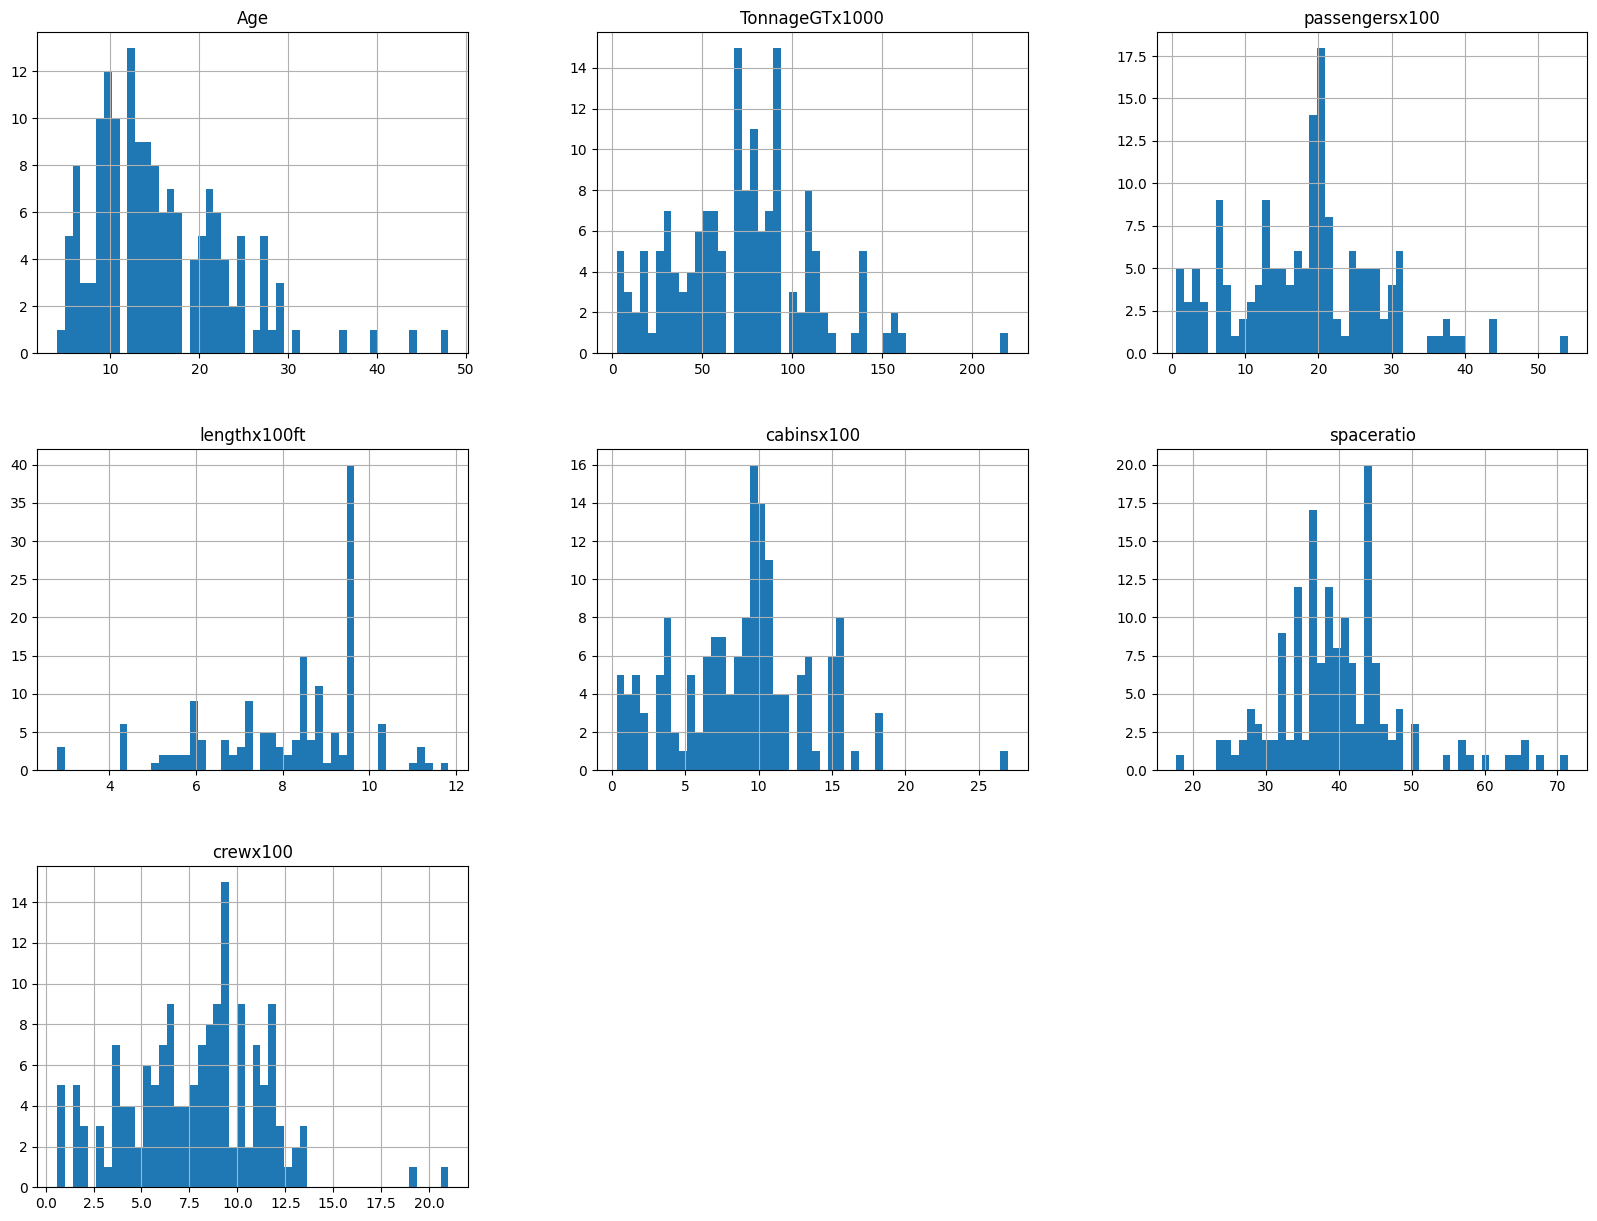

In [5]:
# looks pretty normall-y distributed
df.hist(bins=50, figsize=(20, 15))
plt.show()

## Assignment ##
Use data set ‘cruise_ship_info.csv’ to predict the number of crews required to man a cruise ship given certain features/attributes of the ship. 
**Target variable is Crewx100**

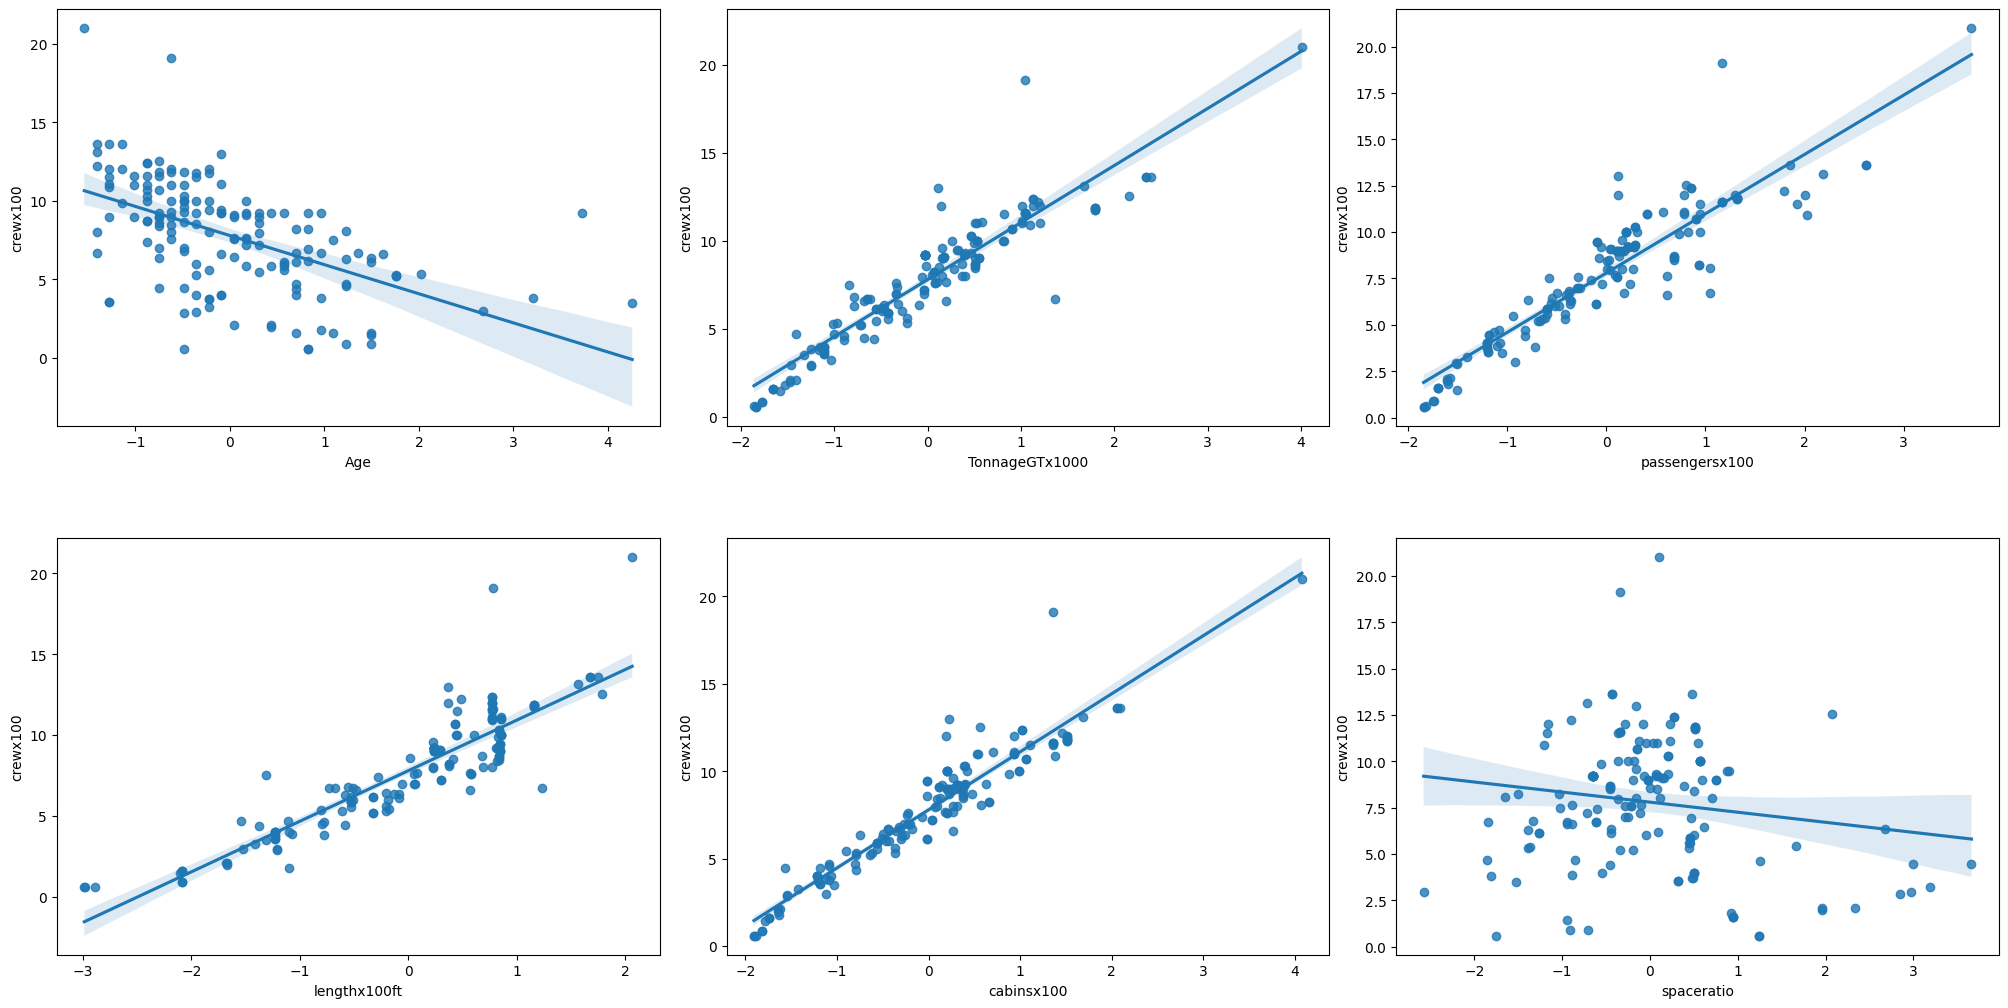

In [6]:
from sklearn import preprocessing
import seaborn as sns

# scale using standard scaler !
standard_scaler = preprocessing.StandardScaler()
remove = ["Ship_name", "Cruise_line", "crewx100"]
feature_cols = [x for x in df.columns if x not in remove]

X = df.loc[:, feature_cols]
y = df["crewx100"]
X = pd.DataFrame(data=standard_scaler.fit_transform(X), columns=feature_cols)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()  ## returns flatted version of array
for i, k in enumerate(feature_cols):
    # Plot data and a linear regression model fit.
    sns.regplot(y=y, x=X[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [7]:
# Split the 158 rows of sample into 70% training and 30% test. In train_test_split, use random_state = 0

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=0
)
print(len(X_train), len(y_train), len(X_test), len(y_test))
print(type(X_train), type(y_train), type(X_test), type(y_test))

110 110 48 48
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


$Y_k ^{*} =\hat{b} _0 + \hat{b} _1 X_{1k} + \hat{b} _2 X_{2k} + \hat{b} _3 X_{3k} + ... $ where

* $Y_k ^{*} =\text{predicted value of } Y_k$
* $\hat{b} _0  = \text{intercept (train) } $
* $\hat{b} _{1k},  \hat{b} _{2k}, etc = \text{slopes coefficients from the fitting in the training set} $
* $X _{1k},  X _{2k}, etc = \text{rom the test data set.} $

Note Mean Squared Error 
$$
\frac{1}{n} \sum\limits_{i=1}^N (Y_k - \bar{Y_k})
$$
thats why we mutliply by n.

Let's setup the commonly used functions first

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


def retreive_train_results(X_train, y_train, reg_obj):
    y_pred_train = reg_obj.predict(X_train)
    r2_score_train = r2_score(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    return {"r2_score_train": r2_score_train, "rmse_train": rmse_train}


def retreive_test_results(X_test, y_test, reg_obj):
    def tss(y_test):
        return ((y_test - np.mean(y_test)) ** 2).sum()

    y_pred = reg_obj.intercept_ + np.dot(X_test, reg_obj.coef_.T)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    # can just use r2_score_Linreg_test = r2_score(y_test, y_pred) actually
    r2_score_test = 1 - (len(y_pred) * (rmse_test) ** 2) / tss(y_test)
    return {"r2_score_test": r2_score_test, "rmse_test": rmse_test}

Q1. Using LinearRegression in sklearn.linear.model, find $R^2$ for training data set, and $R^2$ score for the
test data set.


In [9]:
# do linreg here
from sklearn.linear_model import LinearRegression

Linreg = LinearRegression()
Linreg.fit(X_train, y_train)
# print("Intercept (train):", Linreg.intercept_)
# print("Slopes (train):", Linreg.coef_)
# print(Linreg.__dict__)
print("Linreg results")
print(retreive_train_results(X_train, y_train, Linreg))
print(retreive_test_results(X_test, y_test, Linreg))

Linreg results
{'r2_score_train': 0.9118485946473178, 'rmse_train': 1.069734381494056}
{'r2_score_test': 0.957979988701403, 'rmse_test': 0.6504043106009932}


Q2. Now use a Ridge Regression with alpha = 0.05 and report the training and test R2 scores.

In [10]:
from sklearn.linear_model import Ridge

Ridge = Ridge(
    alpha=0.05,
)
Ridge.fit(
    X_train, y_train
)  ### training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
# print("Intercept (train):", Ridge.intercept_)
### To retrieving the slope:
# print("Slopes (train):", Ridge.coef_)
# print(Ridge.__dict__)
print("Ridge Results")
print(retreive_train_results(X_train, y_train, Ridge))
print(retreive_test_results(X_test, y_test, Ridge))

Ridge Results
{'r2_score_train': 0.91183614324737, 'rmse_train': 1.0698099289016658}
{'r2_score_test': 0.9581595215538381, 'rmse_test': 0.6490133788743184}


Q3. Now use a LASSO Regression with alpha = 0.01 and report the training and test R2 scores.

In [11]:
from sklearn.linear_model import Lasso

Lasso = Lasso(
    alpha=0.01,
)
Lasso.fit(
    X_train, y_train
)  ### training the algorithm, note regression is done without normalizing the X, y
### To retrieve the intercept:
# print("Intercept (train):", Lasso.intercept_)
### To retrieving the slope:
# print("Slopes (train):", Lasso.coef_)
### check attribs
# print(Lasso.__dict__)
print("Lasso Results")
print(retreive_train_results(X_train, y_train, Lasso))
print(retreive_test_results(X_test, y_test, Lasso))

Lasso Results
{'r2_score_train': 0.9109477560568731, 'rmse_train': 1.0751864134278102}
{'r2_score_test': 0.9567576421666848, 'rmse_test': 0.6597965063785997}


Q4. Now use 4-fold cross validation (without reshuffling), on the X_train and y_train. Use Linreg and report the mean R2 scores and standard deviation of R2 scores in the 4 cross-validation cases.

In [12]:
### We can try reshuffling the X_train,y_train point positions here if we wish
from sklearn.utils import shuffle

X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=0)
### Rename X_Shuffle y_shuffle
X_train = X_shuffle
y_train = y_shuffle
### shuffle just randomly permutates the rows

In [13]:
### Now k-fold cross validation is to be performed on X_train y_train reshuflled dataset as in [29], leaving test set intact
### Predicting Cross Validation Score
### By default cross_val_score uses the scoring provided in the given estimator, which is r2 score here
### Details of other scoring methods and metrics can be found in https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.model_selection import cross_val_score

scoresLinreg = cross_val_score(estimator=Linreg, X=X_train, y=y_train, cv=4)
### This combined training set X_train, y_train is split into k=4 (cv=4) folds for each of k=1,2,...,4 repetitions
print(scoresLinreg)
### Score is R2 measure, there are 4 scores since k=cv=4, one for each repetition
print(
    "Linreg 4-fold cross validation: %0.4f mean R2 with a standard deviation of %0.4f"
    % (scoresLinreg.mean(), scoresLinreg.std())
)

[0.91467647 0.94529535 0.86932037 0.82363   ]
Linreg 4-fold cross validation: 0.8882 mean R2 with a standard deviation of 0.0461


Q5. Now use 4-fold cross validation (without reshuffling), on the X_train and y_train. Use Ridge
regression (alpha = 0.05) and report the mean R2 scores and standard deviation of R2 scores in the 4
cross-validation cases.


In [14]:
### Now k-fold cross validation is to be performed on X_train y_train dataset in [29], leaving test set intact
### Predicting Cross Validation Score
### By default cross_val_score uses the scoring provided in the given estimator, which is r2 score here

from sklearn import linear_model

Ridge = linear_model.Ridge(
    alpha=0.05,
)
### Do not need to specify Ridge.fit(X_train, y_train)
### Above steps may be repeated in order to try different hyperparameter of alpha and select one with highest ave R2

from sklearn.model_selection import cross_val_score

scoresRidge = cross_val_score(estimator=Ridge, X=X_train, y=y_train, cv=4)
print(scoresRidge)
print(
    "Ridge 4-fold cross validation:%0.4f mean R2 with a standard deviation of %0.4f"
    % (scoresRidge.mean(), scoresRidge.std())
)

[0.91443271 0.94691849 0.87040106 0.8227426 ]
Ridge 4-fold cross validation:0.8886 mean R2 with a standard deviation of 0.0467
